Objective

To analyze the World Happiness Report dataset to uncover:

- Regional and global trends in happiness scores.

- Key factors influencing happiness, such as GDP, social support, and life expectancy.

- Rankings of countries based on happiness scores.

This project will demonstrate skills in data cleaning, grouping, correlation analysis, and visualization.

📌 Task 1: Load and Inspect the Dataset

In [4]:
import pandas as pd

happiness_Data = pd.read_csv("world_happiness.csv")

print(happiness_Data.head())
print(happiness_Data.info())
print(happiness_Data.describe())
print(happiness_Data.columns)


   OverallRank       Country  Score  GDP per capita  Social support  \
0          145   Afghanistan  3.632           0.332           0.537   
1          112       Albania  4.586           0.916           0.817   
2           84       Algeria  5.295           0.979           1.154   
3          142        Angola  3.795           0.730           1.125   
4           29     Argentina  6.388           1.073           1.468   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.255                         0.085       0.191   
1                    0.790                         0.419       0.149   
2                    0.687                         0.077       0.055   
3                    0.269                         0.000       0.079   
4                    0.744                         0.570       0.062   

   Perceptions of corruption  
0                      0.036  
1                      0.032  
2                      0.135  
3               

Data Loading

- The `world_happiness.csv` dataset contains information on happiness scores for countries worldwide.

Data Overview
- The dataset contains `<number>` rows and `<number>` columns.

- Columns include:
  - `Country`: Name of the country.

  - `OverallRank`: World rank.

  - `Score`: The overall happiness score.

  - Additional columns for factors such as `GDP per Capita`, `Social Support`, `Healthy Life Expectancy`, and more.

📌 Task 2: Data Cleaning

- Lets remove unwanted spaces from our string content and for that we'll use applymap()

In [5]:
happiness_Data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\GAMERS\AppData\Local\Temp\ipykernel_1292\2679147307.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  happiness_Data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,OverallRank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036
1,112,Albania,4.586,0.916,0.817,0.790,0.419,0.149,0.032
2,84,Algeria,5.295,0.979,1.154,0.687,0.077,0.055,0.135
3,142,Angola,3.795,0.730,1.125,0.269,0.000,0.079,0.061
4,29,Argentina,6.388,1.073,1.468,0.744,0.570,0.062,0.054
...,...,...,...,...,...,...,...,...,...
151,102,Venezuela,4.806,0.996,1.469,0.657,0.133,0.056,0.052
152,95,Vietnam,5.103,0.715,1.365,0.702,0.618,0.177,0.079
153,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
154,125,Zambia,4.377,0.562,1.047,0.295,0.503,0.221,0.082


In [6]:
print("null:", happiness_Data.isnull().sum())

null: OverallRank                     0
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64


Handling Missing Values

We need to check if any columns contain missing values and handle them appropriately.

For numerical columns, we'll replace missing values with the **mean** or **median**.


Why mean?

- It preservers data distribution

- Prevent data loss

- Missing data cannot be proccessed by machine learning models

- It helps prserves all available records 

- Now we've handled the missing value situiation but first i will like to tell you some tricks when and when not to use mean.

When NOT to Use the Mean
While using the mean is effective in many cases, there are better alternatives in different scenarios:

📌 When NOT to Use the Mean
While using the mean is effective in many cases, there are better alternatives in different scenarios:

- Situation	                    - Best Replacement Method

- Skewed Data (Outliers Present) - Use the median instead of the mean.

- Categorical Data(e.g.Region,Country) - Use the mode (most frequent value).

- Time-Series Data -	Use the previous/next value (interpolation).

- Large Missing Sections- Consider dropping the column or using predictive modeling.

📌 Understanding Skewed Data & How to Check Distribution

- Skewed data refers to a dataset where values are not symmetrically distributed around the mean. In simpler terms, if most data points are clustered on one side with a long tail on the other, the data is skewed.

1️⃣ What is Skewness?

Skewed data refers to a dataset where values are not symmetrically distributed around the mean. In simpler terms, if most data points are clustered on one side with a long tail on the other, the data is skewed.

Types of Skewness:

📈 Right Skewed (Positive Skew)

- Tail is longer on the right side (higher values are stretched out).
The mean > median.

Example: Income Distribution (most people earn less, but a few earn extremely high amounts).

📉 Left Skewed (Negative Skew)

- Tail is longer on the left side (lower values are stretched out).
The mean < median.

Example: Age of Retirement (most people retire around the same age, but a few retire much earlier).

🔍 Symmetric (Normal Distribution)

- Evenly distributed around the center.
Mean ≈ Median ≈ Mode.

Example: Height of people (most heights fall around the average with few extremes).





2️⃣ How to Check if Data is Skewed?

📌 Method 1: Summary Statistics (Check Mean & Median)

Lets Check out this way:


In [7]:
if happiness_Data["Perceptions of corruption"].mean() > happiness_Data["Perceptions of corruption"].median():
    print("data is right-skewed.")
elif happiness_Data["Perceptions of corruption"].mean() < happiness_Data["Perceptions of corruption"].median():
    print("data is left-skewed.")
else:
    print("data is normally distributed.")

data is right-skewed.


✅ Interpretation:

If mean > median, data is right-skewed - median.

If mean < median, data is left-skewed  - median.

If mean ≈ median, data is normally distributed - mean.


- According to the Method-1 (Statistics) our data is right-skewed.

📌 Method 2: Histogram Plot

Lets check out this way now:


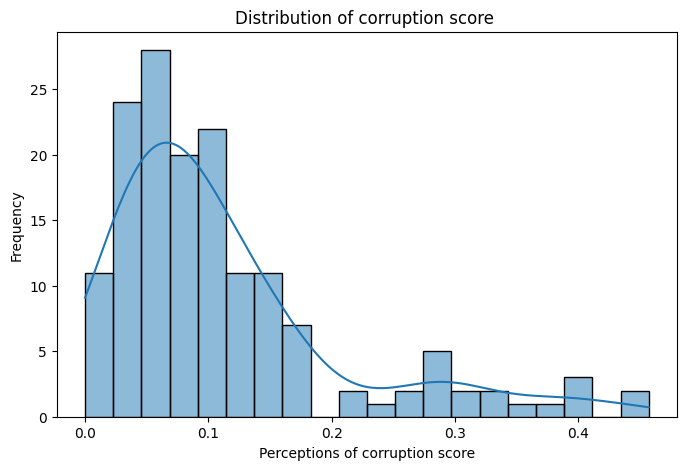

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(happiness_Data["Perceptions of corruption"], bins=20, kde=True)
plt.title("Distribution of corruption score ")
plt.xlabel("Perceptions of corruption score")
plt.ylabel("Frequency")
plt.show()

- According to this also our data is right-skewed.

- A long tail on the right = Right-skewed.
✅ Interpretation:

A bell-shaped curve = Normal distribution.

A long tail on the right = Right-skewed.

A long tail on the left = Left-skewed.

- Data Type	- Recommended Replacement for Missing Values

- Normally Distributed	- Replace with Mean

- Right-Skewed	- Replace with Median

- Left-Skewed	- Replace with Median

📌 Method 3: Skewness Calculation

Skewness values provide a numerical way to measure the extent of skew.

1️⃣ Comparing Skewness with 0:

Use this when you want to check for a perfectly normal distribution.

Skewness = 0 → Perfectly normal (symmetrical) distribution.

Skewness > 0 → Right-skewed.

Skewness < 0 → Left-skewed.

📌 When to use this?

When working with strictly normal distributions (e.g., certain statistical models assume normality).

If you need precise Gaussian (bell curve) distributions.

2️⃣ Comparing Skewness with 0.5:

Use this when deciding whether to treat the data as skewed or normal.

Skewness between -0.5 and 0.5 → Data is approximately normal.

Skewness > 0.5 → Moderate right skew.

Skewness < -0.5 → Moderate left skew.

Skewness > 1 or < -1 → Highly skewed data.

📌 When to use this?

When determining whether to replace missing values with mean (for normal data) or median (for skewed data).

If the skewness is between -0.5 and 0.5, mean imputation is acceptable.

If skewness is beyond ±0.5, use the median instead.

so we'll use 0.5 comparison


When determining whether to replace missing values with mean (for normal data) or median (for skewed data).

If the skewness is between -0.5 and 0.5, mean imputation is acceptable.

If skewness is beyond ±0.5, use the median instead.

In [9]:
skew_value = happiness_Data["Perceptions of corruption"].skew()

if -0.5 <= skew_value <=  0.5 :
    happiness_Data.fillna(happiness_Data["Perceptions of corruption"].mean(), inplace=True)
else:
    happiness_Data.fillna(happiness_Data["Perceptions of corruption"].median(), inplace=True)
print(skew_value)

1.6796783330570055


So we've tackled our null value problem and from now on always use 2 methods atleast including .skew()

- so we've replaced the null value by median

📌 Checking for Duplicates

Duplicate records can distort our analysis, so we need to remove them if they exist.

In [10]:
print("duplicates:" , happiness_Data.duplicated().sum())

duplicates: 0


- We have 0 duplicated data in our happiness_data, so lets move forward


📌 Task 3: Exploratory Data Analysis (EDA)

📌 Descriptive Statistics

To understand the distribution of data, we'll compute summary statistics for numerical columns.

In [11]:
print(happiness_Data.describe())

       OverallRank       Score  GDP per capita  Social support  \
count   156.000000  156.000000      156.000000      156.000000   
mean     78.500000    5.375917        0.891449        1.213237   
std      45.177428    1.119506        0.391921        0.302372   
min       1.000000    2.905000        0.000000        0.000000   
25%      39.750000    4.453750        0.616250        1.066750   
50%      78.500000    5.378000        0.949500        1.255000   
75%     117.250000    6.168500        1.197750        1.463000   
max     156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.180942   
std                   0.247579                      0.162424    0.098460   
min                   0.000000                      0.000000    0.000000   
25%                   0.4

Markdown: Counting Unique Values

📌 Counting Unique Values

We'll check how many unique countries are present in the dataset.

In [12]:
print(happiness_Data["Country"].nunique(),"unique countries in the dataset.")

156 unique countries in the dataset.


So we also don't have duplicated countries.

📌 Task 3.2: Identify Extremes

📌 Identifying Extremes

We'll find the **happiest country** (highest happiness score) and the **least happy country** (lowest happiness score).

In [13]:
max_happiness = happiness_Data.loc[happiness_Data["Score"].idxmax()]

min_happiness = happiness_Data.loc[happiness_Data["Score"].idxmin()]

print(max_happiness,min_happiness)

OverallRank                            1
Country                          Finland
Score                              7.632
GDP per capita                     1.305
Social support                     1.592
Healthy life expectancy            0.874
Freedom to make life choices       0.681
Generosity                         0.192
Perceptions of corruption          0.393
Name: 44, dtype: object OverallRank                          156
Country                          Burundi
Score                              2.905
GDP per capita                     0.091
Social support                     0.627
Healthy life expectancy            0.145
Freedom to make life choices       0.065
Generosity                         0.149
Perceptions of corruption          0.076
Name: 22, dtype: object


- Extremes analysis observation

- Happiest country is Finlad with Score 7.632

- Least happiest country is Burundi with score 2.905

- And, as we can see the Gdp per capita is also affecting the score and we'll check this analysis next which is **Correlation Analysis**

📌 Correlation Analysis

We'll examine how happiness is correlated with factors like GDP, social support, and corruption perception.

In [14]:
print(happiness_Data.dtypes)

OverallRank                       int64
Country                          object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object


- For correlation analysis we need only numeric data.

In [15]:
numeric_data = happiness_Data.select_dtypes(include="number")

correlation_matrix = numeric_data.corr()

print(correlation_matrix)

                              OverallRank     Score  GDP per capita  \
OverallRank                      1.000000 -0.991749       -0.804466   
Score                           -0.991749  1.000000        0.800976   
GDP per capita                  -0.804466  0.800976        1.000000   
Social support                  -0.737500  0.745760        0.671733   
Healthy life expectancy         -0.777837  0.775122        0.844273   
Freedom to make life choices    -0.530786  0.544280        0.321775   
Generosity                      -0.102489  0.134519       -0.014150   
Perceptions of corruption       -0.366387  0.400596        0.294777   

                              Social support  Healthy life expectancy  \
OverallRank                        -0.737500                -0.777837   
Score                               0.745760                 0.775122   
GDP per capita                      0.671733                 0.844273   
Social support                      1.000000                 0.66707

Correlation Analysis

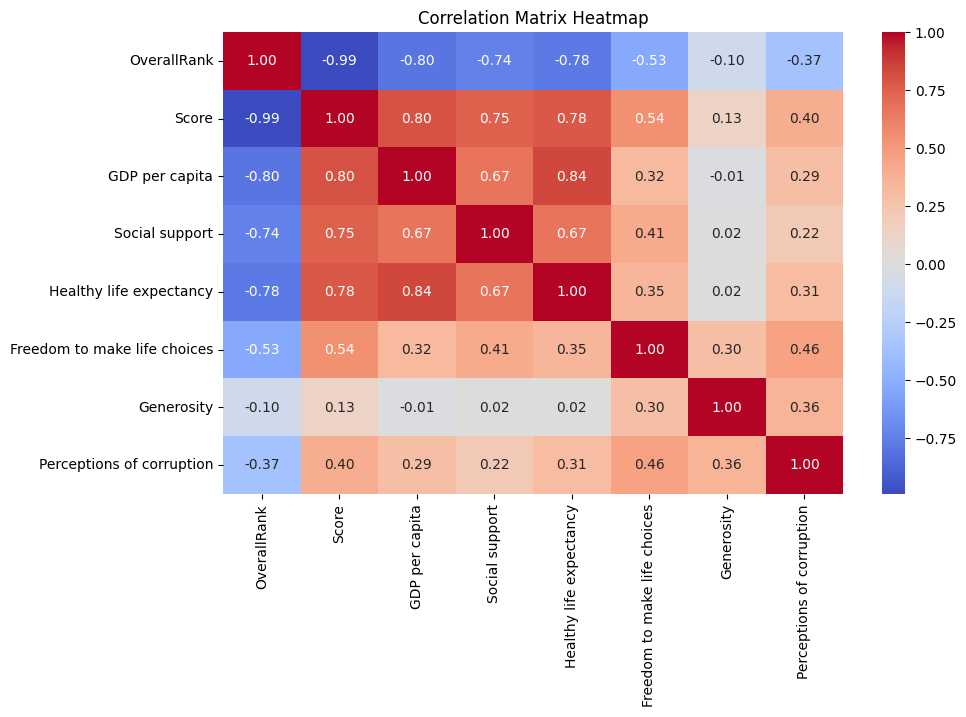

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

1️⃣ Correlation Value Interpretation

Correlation Value (r)	Meaning

r = 1	Perfect positive correlation (⬆⬆ or ⬇⬇)

r > 0.7	Strong positive correlation

r = 0.3 to 0.7	Moderate positive correlation

r = 0 to 0.3	Weak positive correlation

r = 0	No correlation (variables are independent)

r = -0.3 to -0.7	Moderate negative correlation

r < -0.7	Strong negative correlation

r = -1	Perfect negative correlation (⬆⬇)

📌 Key Idea:

Positive correlation (e.g., 0.80) → When one variable increases, the other also increases.

Negative correlation (e.g., -0.80) → When one variable increases, the other decreases.

Closer to 0 → No meaningful relationship between the variables.


2️⃣ Key Insights from Your Correlation Matrix
From the matrix in your image, let’s break down some important relationships:

> 1. Strong Positive Correlations (r > 0.7)

✅ Score vs GDP per capita (0.80)

- Countries with higher GDP per capita tend to have higher happiness scores.

- Economic prosperity is a key factor in happiness.

✅ Score vs Social Support (0.75)

- Countries with strong social support systems tend to have higher happiness scores.

- Indicates that economic factors alone do not determine happiness.

✅ Score vs Healthy Life Expectancy (0.77)


- Higher life expectancy is associated with higher happiness.

- This suggests good healthcare systems contribute to national happiness.

> 2. Moderate Positive Correlations (0.3 to 0.7)

✅ Score vs Freedom to Make Life Choices (0.54)

- People in countries with more personal freedom report higher happiness.

- Indicates that government policies affecting individual freedoms impact happiness.

✅ Score vs Generosity (0.13)

- A weaker relationship, but countries with higher generosity levels tend to have higher happiness.

- This is less significant compared to GDP or health.

✅ Score vs Perceptions of Corruption (0.40)

- Less corruption is associated with higher happiness.

- Not as strong as economic or social factors, but still important.

> 3. Strong Negative Correlations (r < -0.7)

❌ Overall Rank vs Score (-0.99)

- Since lower rank means higher happiness, this is expected.

❌ Overall Rank vs GDP per capita (-0.80)

- Higher-ranked (happier) countries tend to have higher GDP per capita.

❌ Overall Rank vs Social Support (-0.73)

- Higher-ranked (happier) countries tend to have better social support systems.

📌 Interpretation:

- Lower ranking = Higher happiness (because the best country is ranked #1).

- We expect strong negative correlations with factors that contribute to happiness.

3️⃣ How to Use This Analysis?

> 1. Key Takeaways

🔹 Happiness is strongly influenced by GDP per capita, social support, and life expectancy.

🔹 Corruption has a moderate impact—less corruption leads to more happiness.

🔹 Freedom to make life choices is important, but generosity has a smaller impact.

> 4️⃣ Conclusion

- Factor	Impact on Happiness Score

- GDP per capita	 🟢 Strong Positive (0.80)

- Social support	🟢 Strong Positive (0.75)

- Healthy life expectancy	🟢 Strong Positive (0.77)

- Freedom to make life choices	🟢 Moderate Positive (0.54)

- Generosity	🟢 Weak Positive (0.13)

- Perceptions of corruption	🔴 Moderate Negative (-0.40)



# Scatterplot

📌 On the basis of our Correlation analysis we'll make scatterplot on the one of the biggest factor affection happines index in country

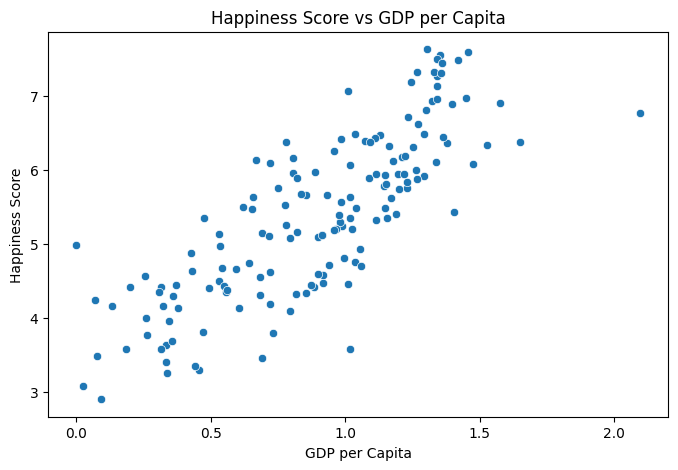

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=happiness_Data["GDP per capita"], y=happiness_Data["Score"])
plt.title("Happiness Score vs GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

📌 Visualization: Top 10 Happiest Countries

A bar chart helps us see which countries have the highest happiness scores.

C:\Users\GAMERS\AppData\Local\Temp\ipykernel_1292\2456715425.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x="Score", y="Country", palette="viridis")


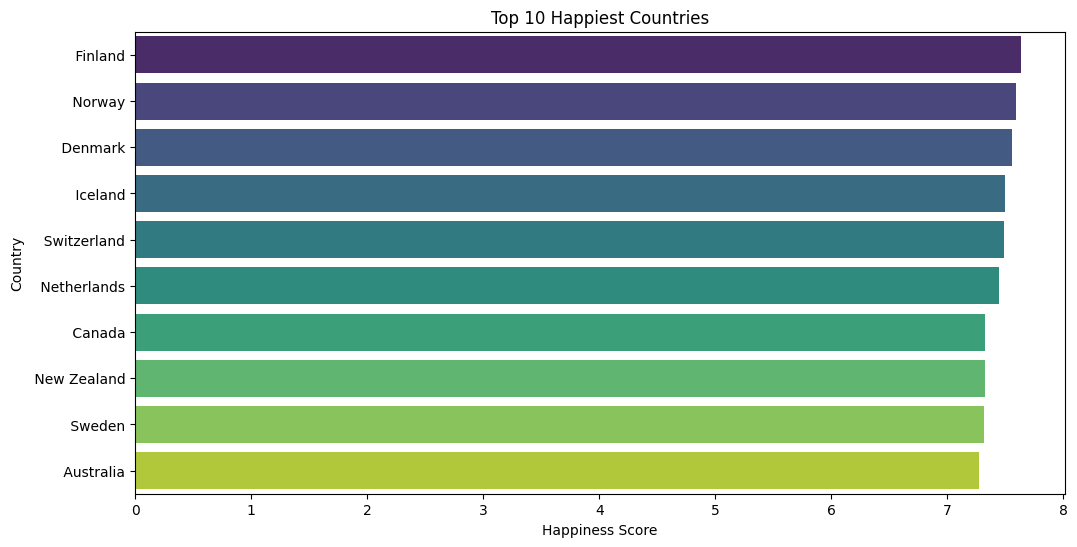

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 happiest countries
top_10 = happiness_Data.nlargest(10, 'Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x="Score", y="Country", palette="viridis")
plt.title("Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

📌 Visualization: Distribution of Happiness Scores

A box plot helps us understand how happiness scores are distributed across countries.

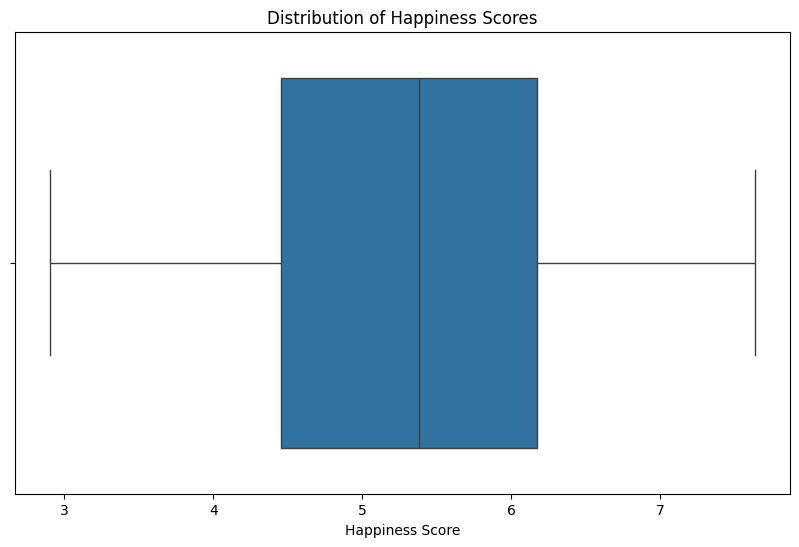

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=happiness_Data, x="Score",showfliers=True)
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.show()


📌 Task 5: Save the Cleaned Data

In [24]:
happiness_Data.to_csv('cleaned_world_happiness.csv', index=False)

📌 Saving the Cleaned Data

To ensure reproducibility, we'll save the cleaned dataset for future analysis.

📌 Conclusion

- The happiest country is **Finland** with a score of **7.632**.

- The least happy country is **Burundi** with a score of **2.905**.

> Correlation analysis Observation

- GDP per capita and social support have the strongest correlation with happiness.

- Countries with higher perceived corruption tend to have lower happiness scores.
